# Random forest model

In [1]:
import os
import xarray as xr
import pandas as pd
import numpy as np

In [2]:
path = "/g/data/w42/dr6273/work/projects/Aus_energy/"

# Load predictors and predictands

Detrended energy demand (predicand)

In [3]:
dem_da = xr.open_dataset(
    path + "/data/energy_demand/daily_demand_2010-2020_detrended.nc"
)["demand_dt"]

Predictors. Load everything from relevant directory.

In [4]:
files = [path + "demand_predictors/" + i for i in os.listdir(path + "demand_predictors/")]

In [5]:
pred_ds = xr.open_mfdataset(files, combine="nested", compat="override").compute()

In [6]:
pred_ds

<xarray.Dataset>
Dimensions:   (region: 6, time: 23376)
Coordinates:
  * region    (region) object 'NEM' 'NSW' 'VIC' 'QLD' 'SA' 'TAS'
  * time      (time) datetime64[ns] 1959-01-01 1959-01-02 ... 2022-12-31
Data variables: (12/15)
    t2min     (region, time) float64 289.3 289.0 289.3 ... 282.1 287.9 287.9
    t2m3      (region, time) float64 nan nan 293.0 293.7 ... 290.2 287.9 289.7
    msdwswrf  (region, time) float64 nan 293.4 257.6 298.1 ... 281.5 249.9 299.6
    cdd4      (region, time) float64 nan nan nan ... 0.221 0.221 -0.001519
    t2m       (region, time) float64 292.7 292.8 293.6 ... 287.1 289.8 292.2
    cdd3      (region, time) float64 nan nan 0.2243 ... -0.001518 -0.001519
    ...        ...
    mtpr      (region, time) float64 2.842e-05 4.244e-05 ... 1.614e-05 6.045e-06
    rh        (region, time) float64 92.39 91.39 91.05 ... 90.65 93.94 92.18
    w10       (region, time) float64 3.489 3.602 3.166 ... 1.758 3.059 3.369
    t2max     (region, time) float64 297.0 297.5 298.1 ... 291.4 292.7 297.2
    hdd3      (region, time) float64 nan nan 0.5113 0.1891 ... 2.974 3.225 1.994
    t2m4      (region, time) float64 nan nan nan 293.5 ... 290.4 290.1 289.0

In [7]:
pred_ds.data_vars

Data variables:
    t2min     (region, time) float64 289.3 289.0 289.3 ... 282.1 287.9 287.9
    t2m3      (region, time) float64 nan nan 293.0 293.7 ... 290.2 287.9 289.7
    msdwswrf  (region, time) float64 nan 293.4 257.6 298.1 ... 281.5 249.9 299.6
    cdd4      (region, time) float64 nan nan nan ... 0.221 0.221 -0.001519
    t2m       (region, time) float64 292.7 292.8 293.6 ... 287.1 289.8 292.2
    cdd3      (region, time) float64 nan nan 0.2243 ... -0.001518 -0.001519
    cdd       (region, time) float64 0.2308 0.1576 ... -0.001518 -0.001518
    hdd4      (region, time) float64 nan nan nan 0.383 ... 2.467 2.565 2.572
    hdd       (region, time) float64 0.9647 0.4147 0.1544 ... 4.028 1.341 0.6154
    mtpr      (region, time) float64 2.842e-05 4.244e-05 ... 1.614e-05 6.045e-06
    rh        (region, time) float64 92.39 91.39 91.05 ... 90.65 93.94 92.18
    w10       (region, time) float64 3.489 3.602 3.166 ... 1.758 3.059 3.369
    t2max     (region, time) float64 297.0 297.5 29

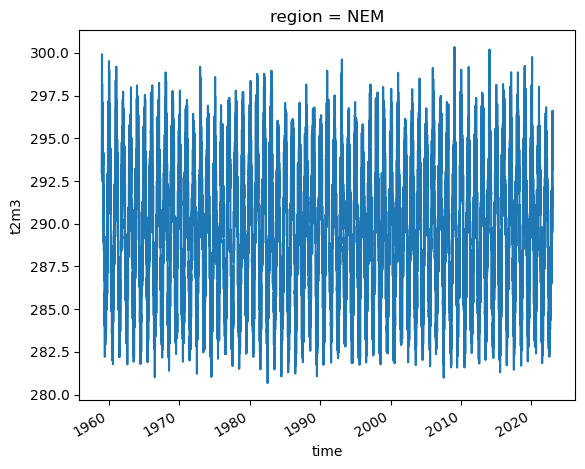

In [8]:
pred_ds.t2m3.sel(region="NEM").plot()

### For a given region, lets look at the data

In [55]:
region = "NEM"

Set this up as a pandas DataFrame

In [56]:
var = pred_ds.sel(region="NEM", time=dem_da["time"]).to_array("variable")

In [57]:
var = xr.concat([
    var,
    dem_da.sel(region=region).expand_dims({"variable": ["demand"]})
], dim="variable"
)

In [58]:
df = pd.DataFrame(
    var.transpose(),
    columns=var["variable"],
    index=dem_da["time"]
)

In [59]:
np.append(df.columns[0], df.columns[1:])

array(['t2min', 't2m3', 'msdwswrf', 'cdd4', 't2m', 'cdd3', 'cdd', 'hdd4',
       'hdd', 'mtpr', 'rh', 'w10', 't2max', 'hdd3', 't2m4', 'demand'],
      dtype=object)

In [60]:
new_cols = np.append("demand", df.columns[:-1])

In [61]:
df = df[new_cols]

In [62]:
df.head()

,demand,t2min,t2m3,msdwswrf,cdd4,t2m,cdd3,cdd,hdd4,hdd,mtpr,rh,w10,t2max,hdd3,t2m4
2010-01-01,294807.001549,292.145415,296.809199,182.786050,1.029217,294.932766,1.224715,0.399848,0.180132,0.293363,0.000080,94.039214,2.851172,298.171089,0.184734,296.334684
2010-01-02,319540.270901,290.632023,295.438404,234.430218,1.062422,293.810930,0.728721,0.575569,0.388894,1.001376,0.000049,92.116179,3.420816,297.977191,0.474258,296.059684
2010-01-03,322477.290253,289.203888,293.665205,227.139658,0.626438,292.251413,0.431673,0.319614,0.664994,1.237203,0.000066,92.519344,2.972514,295.809225,0.843940,294.641710
2010-01-04,299929.999605,289.071438,293.313986,277.943913,0.351973,293.879116,0.336023,0.112899,0.681499,0.194176,0.000008,90.785353,2.582235,298.264651,0.810878,293.718734
2010-01-05,288481.518956,290.031390,293.643693,311.584520,0.314227,294.800052,0.227121,0.248862,0.671171,0.252054,0.000004,90.873502,2.717305,300.019172,0.561104,293.685556


In [63]:
df.describe()

,demand,t2min,t2m3,msdwswrf,cdd4,t2m,cdd3,cdd,hdd4,hdd,mtpr,rh,w10,t2max,hdd3,t2m4
count,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4.017000e+03,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000
mean,288785.458364,285.806126,289.724200,197.157525,0.189848,289.722730,0.189745,0.189406,3.101693,3.102026,2.522528e-05,91.618781,2.804531,294.500139,3.101844,289.724774
std,21330.108382,4.212029,4.245361,71.015301,0.398038,4.346855,0.413376,0.464625,2.546572,2.650115,3.709308e-05,2.587436,0.840310,4.624795,2.573953,4.208375
min,233850.780028,276.277117,281.298693,39.734460,-0.042803,280.520612,-0.042821,-0.042872,0.134577,0.127910,-4.058145e-07,79.600396,0.825634,285.292867,0.128993,281.414124
25%,274307.388296,282.190053,285.781736,135.074378,-0.032195,285.804765,-0.032244,-0.032473,0.775072,0.595623,4.824486e-06,90.104087,2.196789,290.393151,0.758488,285.785636
50%,285536.242409,285.734462,289.822980,193.438305,-0.008278,289.782390,-0.008627,-0.010637,2.332190,2.368812,1.231060e-05,91.788137,2.694688,294.536740,2.319597,289.845694
75%,300812.893972,289.343846,293.404679,256.142540,0.251739,293.359136,0.240208,0.198947,5.366316,5.359362,3.056310e-05,93.476310,3.282778,298.100674,5.352796,293.421330
max,380932.448394,296.988889,300.198910,369.723966,3.178568,301.473381,3.804402,4.660363,9.602082,10.579149,4.930011e-04,98.283851,6.057403,307.955008,9.717825,299.822762


# Split data into training and testing

Using this as a guide: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [70]:
from sklearn.model_selection import train_test_split

In [64]:
labels = np.array(df["demand"]) # predictand

In [66]:
features = df.drop("demand", axis=1) # predictors
features = np.array(features)

In [71]:
train_features, test_features, train_labels, test_labels = train_test_split(
    features,
    labels,
    test_size=0.25,
    random_state=666
)

In [72]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (3012, 15)
Training Labels Shape: (3012,)
Testing Features Shape: (1005, 15)
Testing Labels Shape: (1005,)


Baseline forecast of training sample average

In [76]:
test_features

array([[288.21207665, 292.24275367, 217.87093119, ..., 297.12864152,
          1.51713896, 292.879702  ],
       [289.42896848, 291.66774687, 180.345526  , ..., 297.79790684,
          1.07051599, 291.35132819],
       [279.13561243, 283.20198812, 100.25102483, ..., 286.9221305 ,
          7.83101998, 283.47899911],
       ...,
       [288.34769429, 292.92706118, 295.33018908, ..., 296.43161201,
          0.98477943, 293.34757681],
       [281.69030208, 285.09721773, 106.66064154, ..., 289.39137203,
          6.02795768, 285.17951502],
       [281.90611824, 284.12397645,  63.84824825, ..., 287.56205432,
          6.96066246, 284.01015107]])

In [91]:
# Unrealistically stupid baseline of training-period averaged demand
##(not accounting for season, day of week etc.)
baseline_preds = np.mean(test_labels)

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'MW')

Average baseline error:  16118.89 MW


# Train model

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators=1000, random_state=666)

In [88]:
%%time
# Train the model on training data
rf.fit(train_features, train_labels)

CPU times: user 30 s, sys: 87.1 ms, total: 30.1 s
Wall time: 30.1 s


RandomForestRegressor(n_estimators=1000, random_state=666)

# Make predictions

In [89]:
predictions = rf.predict(test_features)

In [90]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'MW')

Mean Absolute Error: 13581.65 MW


In [93]:
predictions.shape

(1005,)

In [95]:
test_labels.shape

(1005,)

In [96]:
import matplotlib.pyplot as plt

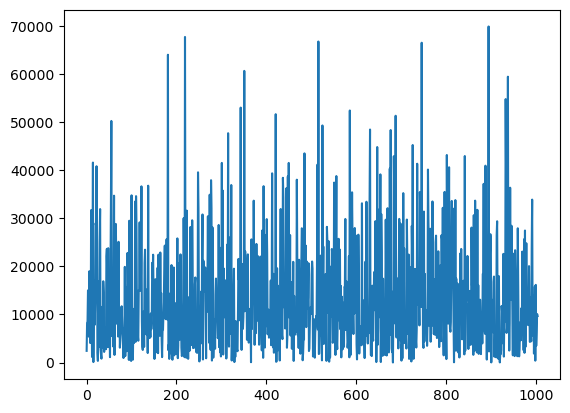

In [97]:
plt.plot(errors)